In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

Funzione per la discesa del gradiente
- alpha => learning rate
- tolerance => ciò che ci permette di fermarci quando non ci sono più miglioramenti significativi nella funzione di costo
- theta => parametri da apprendere
- x => features
- y => target
- m => numero di esempi

In [41]:
def gradientDescent(alpha, tolerance, theta, x, y, m):
    step=1
    previousCost = 1000000000000000
    while True:
        h = np.dot(x, theta) #ipotesi, ovvero i valori predetti
        #Discesa del gradiente
        theta = theta - ((alpha * (1/m)) * np.dot((h - y).T, x).T)
        j_cost = (np.sum((h - y)**2))/(2*m)
        diff = previousCost - j_cost
        if diff < tolerance:
            break
        else:
            #aggiornamento costo & incremento step
            previousCost = j_cost
            step=step+1

    return theta

Funzione per calcolare le predizioni
- x_test => features del test set
- theta => parametri derivanti dalla fase di training

In [42]:
def predictions(x_test, theta):
    pred = np.dot(x_test, theta)
    return pred

Funzione per la valutazione
- prediction => predizioni del modello
- target => target del dataset

In [43]:
def modelEvaluation(prediction, target):
    meanTarget = np.mean(target)

    #R2
    sse = np.sum((prediction-target)**2)
    sst = np.sum((target - meanTarget)**2)
    r2 = 1- (sse/sst)

    #Mean absolute error
    mae = np.mean(np.abs(prediction - target))

    #RMSE
    rmse = np.sqrt((np.sum((prediction - target)**2)) / len(prediction))

    return (r2, rmse)

Funzione per cross validazione

Funzioni di stampa dei risultati

In [44]:
def printLinRegFunction(theta, data):
    print("########## MODELLO ##########")
    print('\n' + data.columns.values[len(theta)] + " = ")
    for i in range(len(theta)):
        print('\t' + str(round(theta[i], 5)) + ' * ' + data.columns.values[i] + ' +')


def printEvaluationResults(r2, rmse):
    print('\n########## RISULTATI VALUTAZIONE ##########')
    print('\nR2 = ' + str(round(r2, 5)))
    print('Root Mean Squared Error = ' + str(round(rmse, 5)))

### Carico il dataset

In [45]:
dataset = pd.read_csv('cars_numeric.csv')

# è meglio mischaire le righe del dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

# bisogna inserire la colonna di bias
dataset.insert(0, 'bias', np.ones(dataset.shape[0]), True)

### Valutazione tramite split 70/30

In [46]:
training_set = dataset.head(round(len(dataset)*(70/100)))
test_set = dataset.tail(len(dataset) - len(training_set)).reset_index(drop=True)

#fase di fit
alpha = 0.1
tolerance = 0.000001
x = training_set.drop('price', axis = 1).values
y = training_set['price'].values
m = len(training_set)

#inizializzazione dei theta
theta = np.random.uniform(-(np.max(y)), np.max(y), size=x.shape[1])

finalTheta = gradientDescent(alpha=alpha, tolerance=tolerance, theta=theta, x=x, y=y, m=m)


#Valutazione
x_test = test_set.drop('price', axis = 1).values
predizione = predictions(x_test, finalTheta)
y_dataset = test_set['price'].values

r2, rmse = modelEvaluation(prediction=predizione, target=y_dataset)

### Stampe & grafici

In [47]:
print("VALUTAZIONE DEL MODELLO TRAMITE SPLIT 70/30")
printLinRegFunction(theta=finalTheta, data=dataset)
printEvaluationResults(r2=r2, rmse=rmse)

VALUTAZIONE DEL MODELLO TRAMITE SPLIT 70/30
########## MODELLO ##########

price = 
	13369.86745 * bias +
	-116.42763 * symboling +
	-704.84661 * normalized-losses +
	-1129.75923 * make +
	4523.88685 * fuel-type +
	277.27017 * aspiration +
	46.34711 * num-of-doors +
	-722.70082 * body-style +
	-738.10193 * drive-wheels +
	1290.51921 * engine-location +
	228.28592 * wheel-base +
	1060.71828 * length +
	-277.80609 * width +
	254.07775 * height +
	2468.44225 * curb-weight +
	551.00993 * engine-type +
	1214.4587 * num-of-cylinders +
	3078.69061 * engine-size +
	-1261.61656 * fuel-system +
	-911.9906 * bore +
	-463.09004 * stroke +
	-3146.67876 * compression-ratio +
	1376.6988 * horsepower +
	995.14645 * peak-rpm +
	-1546.71497 * city-mpg +
	2210.19182 * highway-mpg +

########## RISULTATI VALUTAZIONE ##########

R2 = 0.74607
Root Mean Squared Error = 3115.33003


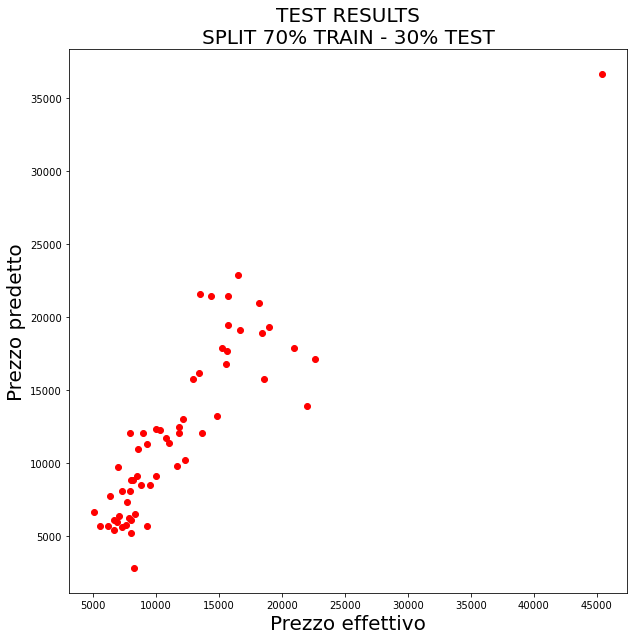

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(x = y_dataset, y = predizione, c='red') 
plt.title("TEST RESULTS\nSPLIT 70% TRAIN - 30% TEST", fontsize=20)
plt.xlabel("Prezzo effettivo", fontsize=20)
plt.ylabel("Prezzo predetto", fontsize=20)
plt.show()